In [1]:
%load_ext autoreload
%autoreload 2

In [372]:
# Script to train machine learning model.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from starter.starter.ml.data import process_data
from starter.starter.ml import model
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
# Add the necessary imports for the starter code.


cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

In [97]:
# Add code to load in the data.
data = pd.read_csv('starter/data/census.csv')

In [6]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
# Remove white spaces
columns = data.columns
columns = [col.replace(" ", "") for col in columns]
data.columns = columns

In [9]:
data.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [121]:
for col in cat_features:
    data[col] = data[col].str.replace('\s+', '', regex=True)

In [236]:
data['encoded_salary'] = pd.get_dummies(data["salary"]).iloc[:,1]

In [237]:
data.to_csv('starter/data/census.csv', index=False)

In [238]:
# Optional enhancement, use K-fold cross validation instead of a train-test split.
train, test = train_test_split(data, test_size=0.20)

In [124]:
X_train, y_train, encoder, lb = process_data(
    train, categorical_features=cat_features, label="salary", training=True
)

/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [269]:
X_train

array([[2.72400e+03, 4.50000e+01, 2.24474e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.91900e+04, 1.70000e+01, 2.95710e+04, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.18500e+03, 4.10000e+01, 2.08174e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.85050e+04, 3.90000e+01, 6.53900e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.43080e+04, 2.20000e+01, 2.10802e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.89600e+03, 7.30000e+01, 1.81902e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [270]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [125]:
# Proces the test data with the process_data function.
X_test, y_test, encoder, lb = process_data(
    test, categorical_features=cat_features, encoder=encoder, lb=lb, label="salary", training=False
)


# Train and save a model.

In [126]:
clf = model.train_model(X_train, y_train)

In [127]:
clf

LogisticRegression(random_state=0)

In [128]:
y_test_pred = model.inference(clf, X_test)

In [129]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
model.compute_model_metrics(y_test, y_test_pred)

(0.7120689655172414, 0.264404609475032, 0.3856209150326797)

## Fairness

In [16]:
! pip install aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 16.0 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460122 sha256=2c6acffb4001ecac0b1bc5a689347dad72dd3a47455f4277b8dcfcf793148a3c
  Stored in directory: /home/beatriz.albiero/.cache/pip/wheels/68/ef/f1/5c44c5d5ddfa1271896b772827c0d7cc9a158b740640de5913
  Created wheel for markdown2: filename=markdown2-2.3.5-py3-none-any.whl size=33327 sha256=50aa863296f9a652af84d91af827c33e8702646be9d0a696aee582a578cd4577
  Stored in directory: /home/beatriz.albiero/.cache/pip/wheels/a4/67/ec/9fae85eae307094de4ec722b3b6a8df6340352238ad97ac335
  Created wheel for millify: filename=millify-0.1.1-py3-none-any.whl size=1843 sha256=a7c3034ca792bcc13db8ca8dd063bd86fccf2f3c6bd9516c88740ee97e01f392
  Stored in directory: /home/beatriz.albiero/.cache/pip/wheels/b6/c9/48/2acfb8a068c5dcaca65fec383479961483de0a33b76446c5da
  Created wheel for tabulate: filename=tabulate-0.8.2-py3-none-any.whl size=23528 sha256=493eeef020cae7c9eb8e61fe6510410a02febc3fd44019e87305b138b53dcea7

In [147]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import seaborn as sns

In [23]:
pd.DataFrame({'label_value':y_test, 'score': y_test_pred})

,label_value,score
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
6508,0,0
6509,0,0
6510,1,0
6511,1,0


In [194]:
aequitas_data = pd.merge(test[["sex", "race"]], pd.DataFrame({'label_value':y_test, 'score': y_test_pred}), left_index=True, right_index=True)

In [175]:
aequitas_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label_value,score
2631,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,0,0
4130,Private,5th-6th,Never-married,Craft-repair,Unmarried,White,Male,El-Salvador,0,0
1000,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States,0,1
3255,?,Assoc-voc,Divorced,?,Not-in-family,White,Male,United-States,0,0
3453,?,HS-grad,Never-married,?,Other-relative,Other,Female,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...
4751,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,0,0
1054,Private,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,Iran,0,0
569,Private,Masters,Divorced,Exec-managerial,Unmarried,White,Male,United-States,1,0
1051,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,Canada,0,0


In [173]:
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [134]:
aequitas_data.race.value_counts()

White                 1105
Black                  131
Asian-Pac-Islander      38
Amer-Indian-Eskimo      11
Other                   10
Name: race, dtype: int64

In [135]:
aq_palette = sns.diverging_palette(225, 35, n=2)


In [136]:
aequitas_data.race.value_counts()

White                 1105
Black                  131
Asian-Pac-Islander      38
Amer-Indian-Eskimo      11
Other                   10
Name: race, dtype: int64

<AxesSubplot: xlabel='race', ylabel='count'>

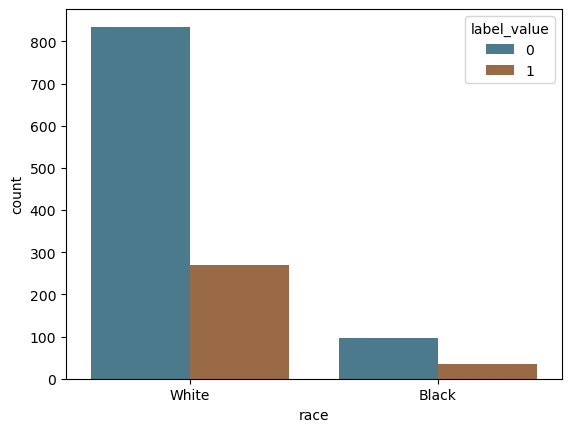

In [137]:
sns.countplot(x="race", hue="label_value", data=aequitas_data[aequitas_data.race.isin(['Black', 'White'])], palette=aq_palette)


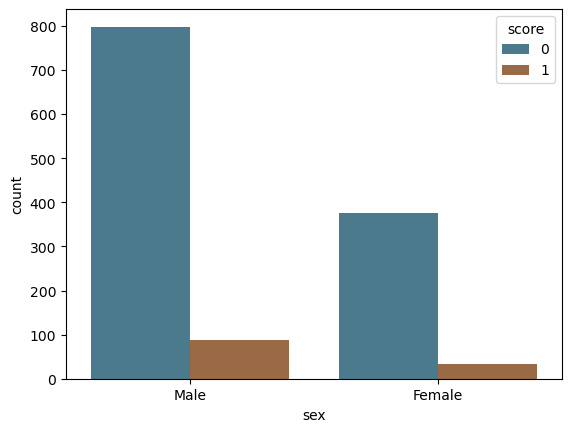

In [139]:
by_sex = sns.countplot(x="sex", hue="score", data=aequitas_data, palette=aq_palette)

In [140]:
data.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [195]:
group = Group()
xtab, _ = group.get_crosstabs(aequitas_data)

xtab.head(10)

/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/aequitas/group.py:182: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'score'] = df.loc[:,'score'].astype(float)


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,122,sex,Female,0.244681,0.965079,0.189333,0.323529,0.034921,...,0.083130,11,71,304,23,94,315,409,1295,0.229829
1,0,binary 0/1,122,sex,Male,0.295964,0.966817,0.196742,0.250000,0.033183,...,0.099323,22,157,641,66,223,663,886,1295,0.251693
2,0,binary 0/1,122,race,Amer-Indian-Eskimo,0.000000,1.000000,0.272727,NaN,0.000000,...,0.000000,0,3,8,0,3,8,11,1295,0.272727
3,0,binary 0/1,122,race,Asian-Pac-Islander,0.100000,0.964286,0.250000,0.500000,0.035714,...,0.052632,1,9,27,1,10,28,38,1295,0.263158
4,0,binary 0/1,122,race,Black,0.235294,0.948454,0.220339,0.384615,0.051546,...,0.099237,5,26,92,8,34,97,131,1295,0.259542
5,0,binary 0/1,122,race,Other,NaN,0.900000,0.000000,1.000000,0.100000,...,0.100000,1,0,9,0,0,10,10,1295,0.000000
6,0,binary 0/1,122,race,White,0.296296,0.968862,0.190190,0.245283,0.031138,...,0.095928,26,190,809,80,270,835,1105,1295,0.244344


In [177]:
absolute_metrics = group.list_absolute_metrics(xtab)


In [196]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]


,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,122,sex,Female,34,375,11,71,304,23,94,315,409,1295
1,0,binary 0/1,122,sex,Male,88,798,22,157,641,66,223,663,886,1295
2,0,binary 0/1,122,race,Amer-Indian-Eskimo,0,11,0,3,8,0,3,8,11,1295
3,0,binary 0/1,122,race,Asian-Pac-Islander,2,36,1,9,27,1,10,28,38,1295
4,0,binary 0/1,122,race,Black,13,118,5,26,92,8,34,97,131,1295
5,0,binary 0/1,122,race,Other,1,9,1,0,9,0,0,10,10,1295
6,0,binary 0/1,122,race,White,106,999,26,190,809,80,270,835,1105,1295


In [156]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)


,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,Amer-Indian-Eskimo,0.00,1.00,0.27,NaN,0.00,1.00,0.73,NaN,0.00,0.00,0.27
1,race,Asian-Pac-Islander,0.10,0.96,0.25,0.50,0.04,0.90,0.75,0.50,0.02,0.05,0.26
2,race,Black,0.24,0.95,0.22,0.38,0.05,0.76,0.78,0.62,0.11,0.10,0.26
3,race,Other,NaN,0.90,0.00,1.00,0.10,NaN,1.00,0.00,0.01,0.10,0.00
4,race,White,0.30,0.97,0.19,0.25,0.03,0.70,0.81,0.75,0.87,0.10,0.24
5,sex,Female,0.24,0.97,0.19,0.32,0.03,0.76,0.81,0.68,0.28,0.08,0.23
6,sex,Male,0.30,0.97,0.20,0.25,0.03,0.70,0.80,0.75,0.72,0.10,0.25


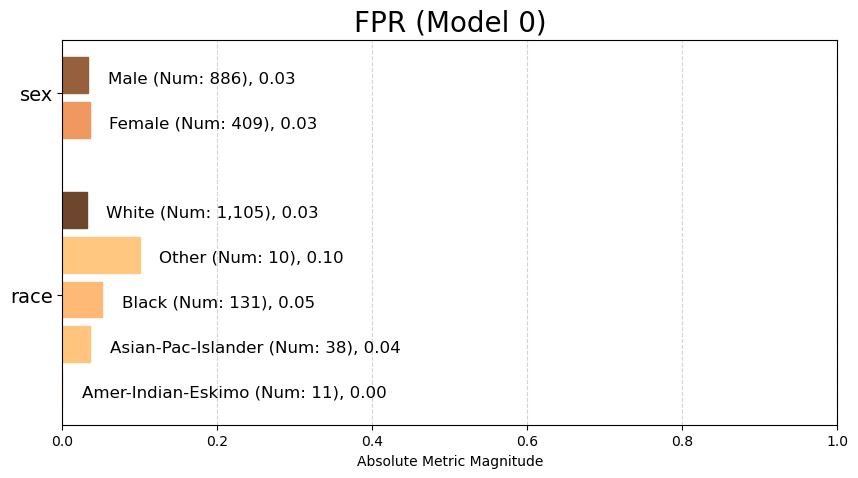

In [157]:
aqp = Plot()
fnr = aqp.plot_group_metric(xtab, 'fpr')

In [197]:
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=aequitas_data, 
                                        ref_groups_dict={'race':'White', 'sex':'Male'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/aequitas/bias.py:606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, difference_significance_p = stats.ttest_ind(
/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/beatriz.albiero/miniconda3/envs/udacity/lib/python3.8/site

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,122,sex,Female,0.244681,0.965079,0.189333,0.323529,0.034921,0.755319,0.810667,0.676471,34,375,0.278689,0.083130,11,71,304,23,94,315,409,1295,0.229829,False,False,1.294118,Male,False,1.072842,Male,False,0.962344,Male,False,1.052381,Male,False,1.009223,Male,False,0.386364,Male,False,0.836964,Male,False,0.901961,Male,False,0.998202,Male,False,0.826725,Male,False
1,0,binary 0/1,122,sex,Male,0.295964,0.966817,0.196742,0.250000,0.033183,0.704036,0.803258,0.750000,88,798,0.721311,0.099323,22,157,641,66,223,663,886,1295,0.251693,False,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False
2,0,binary 0/1,122,race,Amer-Indian-Eskimo,0.000000,1.000000,0.272727,nan,0.000000,1.000000,0.727273,nan,0,11,0.000000,0.000000,0,3,8,0,3,8,11,1295,0.272727,False,False,nan,White,None,1.421053,White,False,1.433971,White,False,0.000000,White,None,0.898078,White,False,0.000000,White,False,0.000000,White,False,nan,White,None,1.032138,White,None,0.000000,White,False
3,0,binary 0/1,122,race,Asian-Pac-Islander,0.100000,0.964286,0.250000,0.500000,0.035714,0.900000,0.750000,0.500000,2,36,0.016393,0.052632,1,9,27,1,10,28,38,1295,0.263158,False,False,2.038462,White,False,1.278947,White,False,1.314474,White,False,1.146978,White,False,0.926143,White,False,0.018868,White,False,0.548659,White,False,0.662500,White,False,0.995276,White,False,0.337500,White,False
4,0,binary 0/1,122,race,Black,0.235294,0.948454,0.220339,0.384615,0.051546,0.764706,0.779661,0.615385,13,118,0.106557,0.099237,5,26,92,8,34,97,131,1295,0.259542,False,False,1.568047,White,False,1.086687,White,False,1.158519,White,False,1.655432,White,False,0.962771,White,False,0.122642,White,False,1.034495,White,False,0.815385,White,False,0.978935,White,False,0.794118,White,False
5,0,binary 0/1,122,race,Other,nan,0.900000,0.000000,1.000000,0.100000,nan,1.000000,0.000000,1,9,0.008197,0.100000,1,0,9,0,0,10,10,1295,0.000000,False,False,4.076923,White,None,nan,White,False,0.000000,White,False,3.211538,White,None,1.234858,White,False,0.009434,White,False,1.042453,White,False,0.000000,White,None,0.928925,White,None,nan,White,False
6,0,binary 0/1,122,race,White,0.296296,0.968862,0.190190,0.245283,0.031138,0.703704,0.809810,0.754717,106,999,0.868852,0.095928,26,190,809,80,270,835,1105,1295,0.244344,False,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False


In [183]:
bias_df = bias.get_disparity_major_group(xtab,
                               original_df=aequitas_data,
                               alpha=0.05,
                               mask_significance=True).head(10)

get_disparity_major_group()


In [199]:
fairness = Fairness()
fairness_df = fairness.get_group_value_fairness(bdf)
fairness_df.head(10)

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,122,sex,Female,0.244681,0.965079,0.189333,0.323529,0.034921,...,True,True,True,True,True,False,True,True,False,False
1,0,binary 0/1,122,sex,Male,0.295964,0.966817,0.196742,0.250000,0.033183,...,True,True,True,True,True,True,True,True,True,True
2,0,binary 0/1,122,race,Amer-Indian-Eskimo,0.000000,1.000000,0.272727,NaN,0.000000,...,False,False,True,True,NaN,False,False,False,False,False
3,0,binary 0/1,122,race,Asian-Pac-Islander,0.100000,0.964286,0.250000,0.500000,0.035714,...,False,False,True,True,False,False,False,False,False,False
4,0,binary 0/1,122,race,Black,0.235294,0.948454,0.220339,0.384615,0.051546,...,True,False,True,True,True,False,True,False,False,False
5,0,binary 0/1,122,race,Other,NaN,0.900000,0.000000,1.000000,0.100000,...,NaN,NaN,True,True,False,False,False,False,False,False
6,0,binary 0/1,122,race,White,0.296296,0.968862,0.190190,0.245283,0.031138,...,True,True,True,True,True,True,True,True,True,True


In [200]:
overall_fairness = fairness.get_overall_fairness(fairness_df)
print(overall_fairness)

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}


In [201]:
metrics = ['fpr', "for", "fnr"]
disparity_metrics = [f"{metric}_disparity" for metric in metrics]

In [202]:
bdf[["attribute_name", "attribute_value"] + metrics + disparity_metrics]

,attribute_name,attribute_value,fpr,for,fnr,fpr_disparity,for_disparity,fnr_disparity
0,sex,Female,0.034921,0.189333,0.755319,1.052381,0.962344,1.072842
1,sex,Male,0.033183,0.196742,0.704036,1.000000,1.000000,1.000000
2,race,Amer-Indian-Eskimo,0.000000,0.272727,1.000000,0.000000,1.433971,1.421053
3,race,Asian-Pac-Islander,0.035714,0.250000,0.900000,1.146978,1.314474,1.278947
4,race,Black,0.051546,0.220339,0.764706,1.655432,1.158519,1.086687
5,race,Other,0.100000,0.000000,NaN,3.211538,0.000000,NaN
6,race,White,0.031138,0.190190,0.703704,1.000000,1.000000,1.000000


In [203]:
eps = 0.000001
bdf[disparity_metrics] = bdf[disparity_metrics].fillna(0.0) + eps

In [204]:
aqp= Plot()

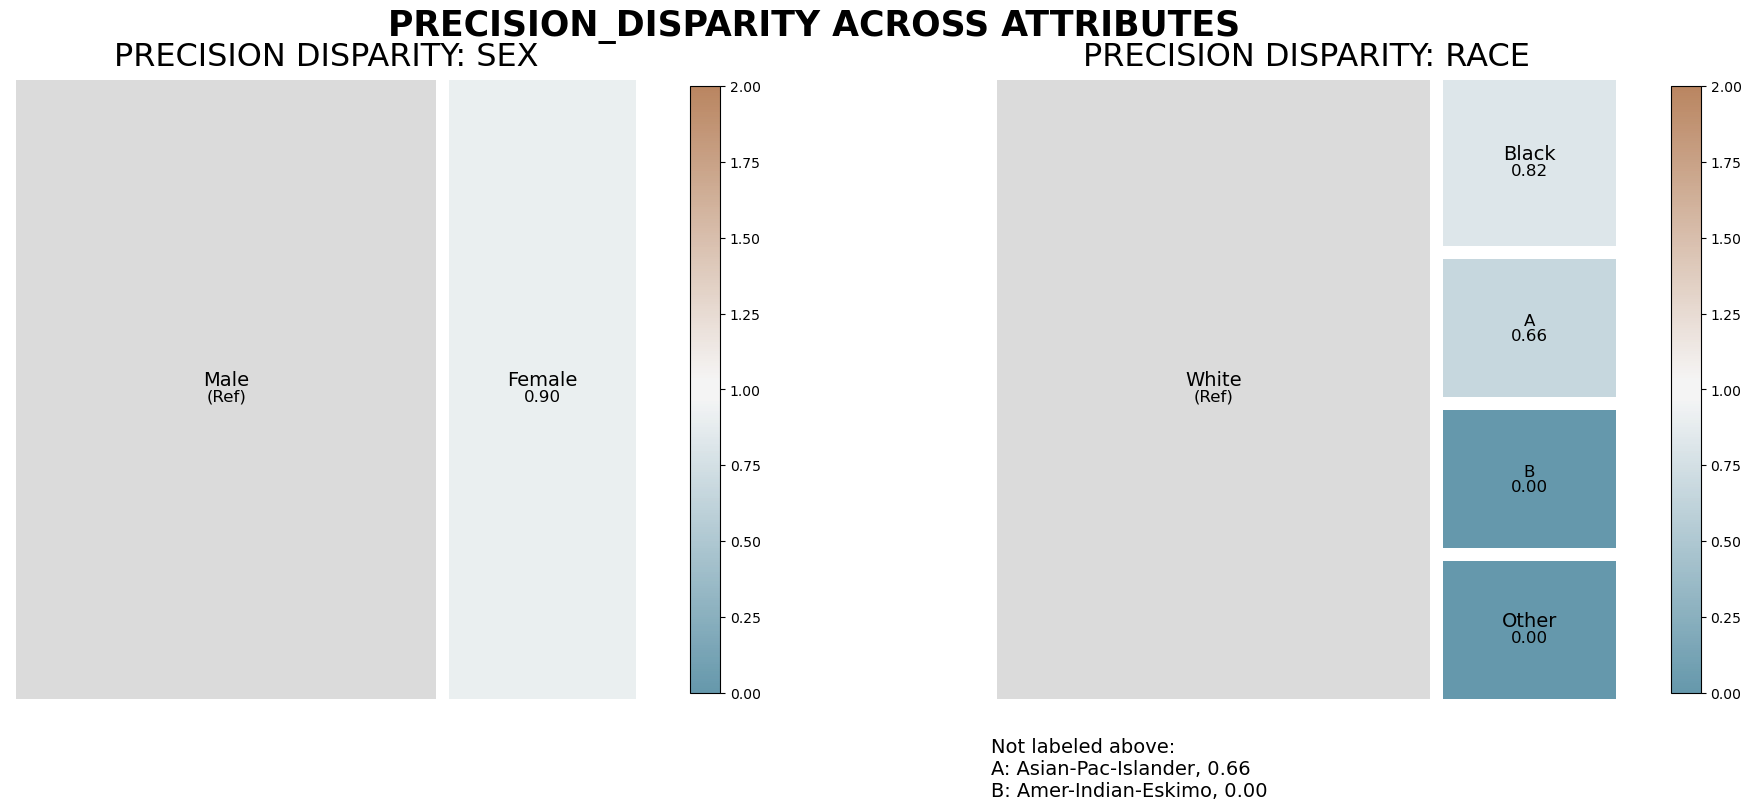

In [205]:
disparity_tolerance = 1.25

# Deprecated function summary()
# ap.summary(bias_df, metrics, fairness_threshold=disparity_tolerance)

# Aequitas Fairness() class provides a few functions that provide a high level summary of fairness and disparity, such as 
# plot_fairness_group()
# plot_fairness_group_all()
# plot_fairness_disparity()
# plot_fairness_disparity_all()
# plot_disparity()
# See some example here: https://github.com/dssg/aequitas/blob/master/docs/source/examples/compas_demo.ipynb 
p = aqp.plot_disparity_all(bdf, metrics=['precision_disparity'], significance_alpha=0.05)


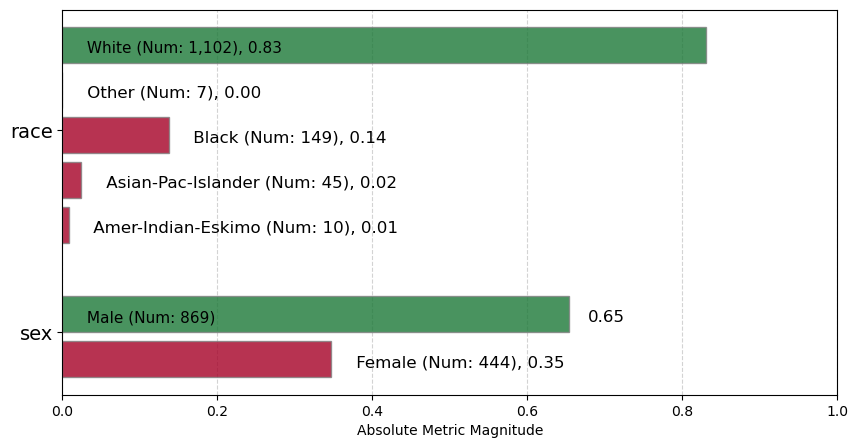

In [162]:
z = aqp.plot_fairness_group(fairness_df, group_metric='ppr')


In [163]:
import pickle
pickle.dump(clf, open('clf_model.sav', 'wb'))

In [165]:
loaded_model = pickle.load(open('clf_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7979425763856901


## Model Card 

In [208]:
import numpy as np

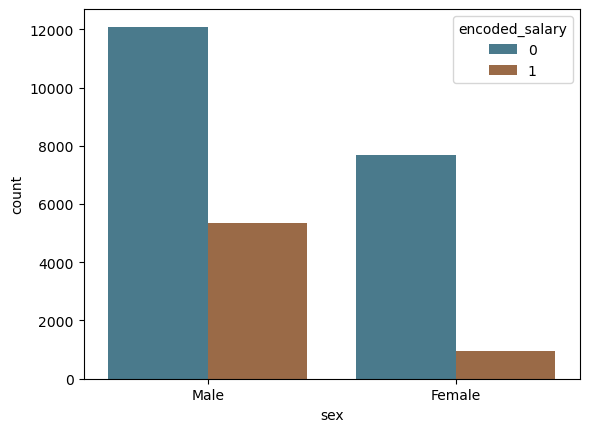

In [241]:
by_sex = sns.countplot(x="sex", hue="encoded_salary", data=train, palette=aq_palette)

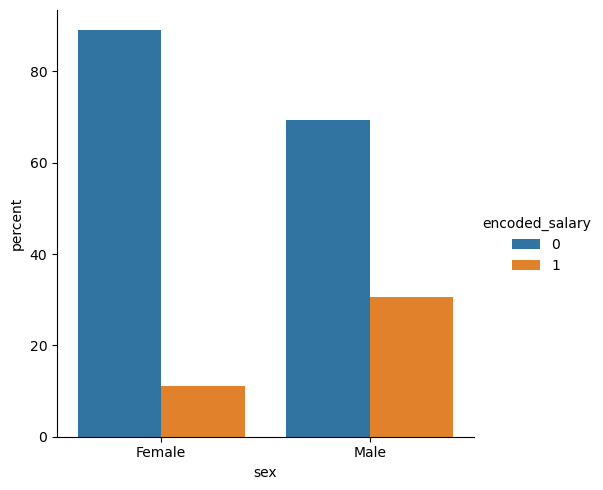

In [248]:
fig = (train
.groupby('sex')['encoded_salary']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='sex',y='percent',hue='encoded_salary',kind='bar'));

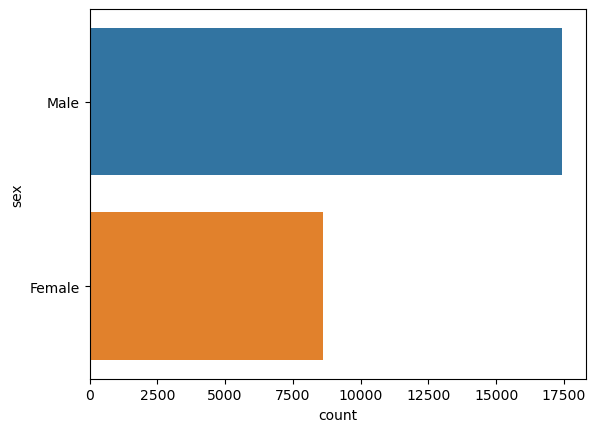

In [261]:
fig = sns.countplot(data=train, y='sex');

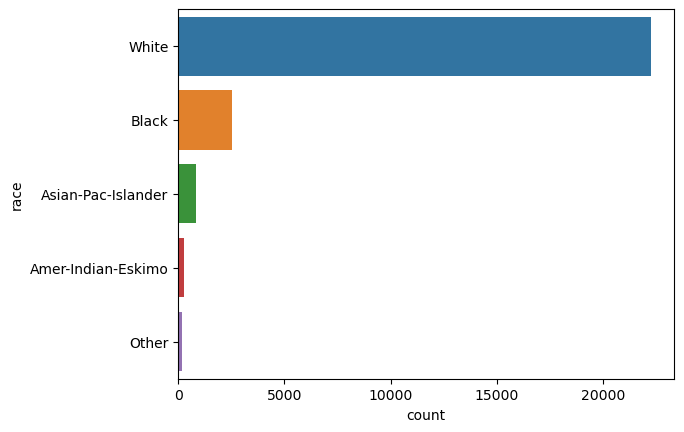

In [263]:
fig = sns.countplot(data=train, y='race');

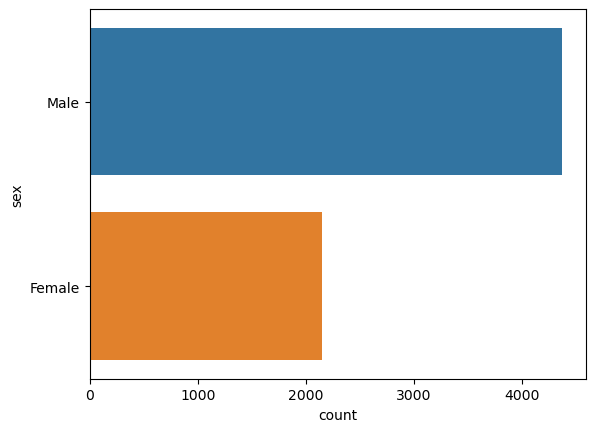

In [264]:
fig = sns.countplot(data=test, y='sex');

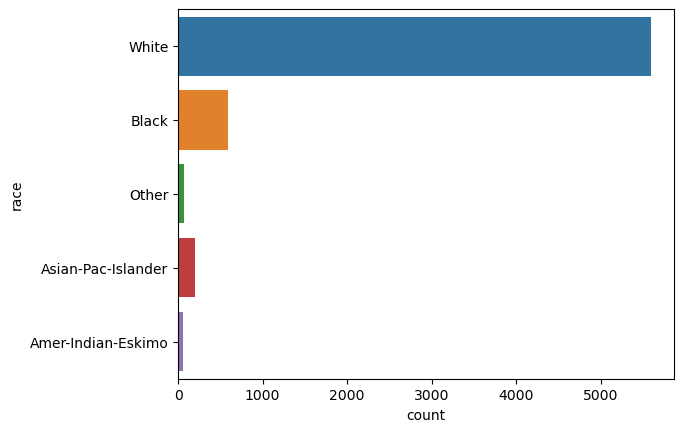

In [265]:
fig = sns.countplot(data=test, y='race');

In [262]:
fig.savefig("income_by_sex_train_count.png") 

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

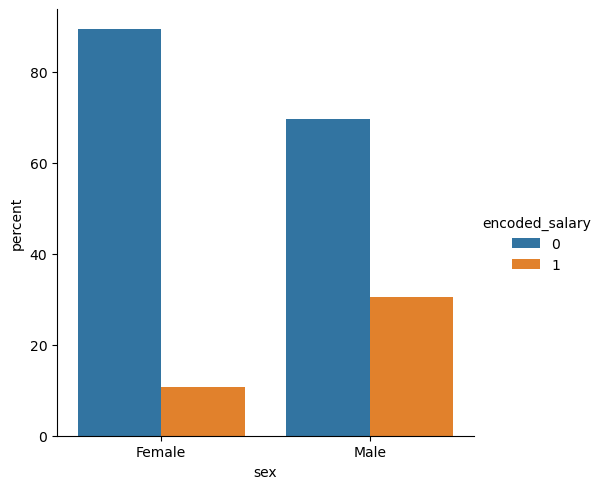

In [250]:
fig = (test
.groupby('sex')['encoded_salary']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='sex',y='percent',hue='encoded_salary',kind='bar'));

In [251]:
fig.savefig("income_by_sex_test.png") 

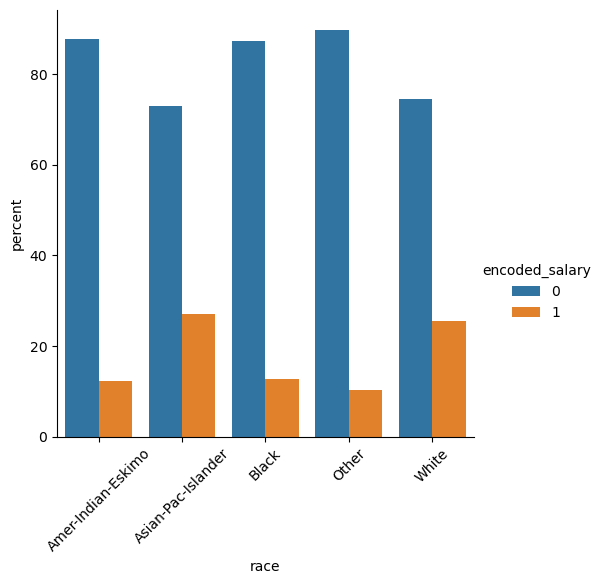

In [257]:
fig = (train
.groupby('race')['encoded_salary']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='race',y='percent',hue='encoded_salary',kind='bar'))
plt.xticks(rotation=45);

In [258]:
fig.savefig("income_by_race_train.png") 

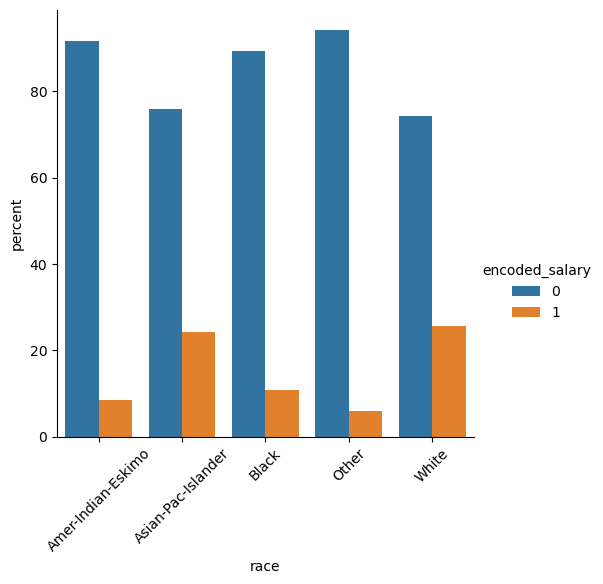

In [259]:
fig = (test
.groupby('race')['encoded_salary']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='race',y='percent',hue='encoded_salary',kind='bar'))
plt.xticks(rotation=45);

In [260]:
fig.savefig("income_by_race_test.png") 

In [266]:
train.race.value_counts()

White                 22224
Black                  2529
Asian-Pac-Islander      840
Amer-Indian-Eskimo      252
Other                   203
Name: race, dtype: int64

In [267]:
22224/(2529+840+252+203)

5.811715481171548

### Tests

In [273]:
np.isin(y_train, [1,0])

array([ True,  True,  True, ...,  True,  True,  True])

In [276]:
def test_target_preprocess_output(target):
    """
    Test modelling target (y) preprocess output.
    """
    
    assert np.isin(target, [1,0]).all()

In [278]:
test_target_preprocess_output(y_test)

In [281]:
X_train.shape

(26048, 109)

In [294]:
X_test.shape

(6513, 109)

In [292]:
count_categories = 0
for col in cat_features:
    count_categories += data[col].unique().shape[0]

In [293]:
count_categories

102

In [283]:
def test_inference_output(preds):
    """
    Test the output of inference module.
    """
    assert np.isin(preds, [1,0]).all()

In [284]:
test_inference_output(y_test_pred)

In [295]:
X_test.shape[1]

109

In [296]:
def test_preprocess_X_shape(X):
    """
    Test the preprocess X output shape.
    """
    assert X.shape[1] == 109

In [297]:
test_preprocess_X_shape(X_train)
test_preprocess_X_shape(X_test)

In [300]:
train['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [301]:
aequitas_data

,sex,race,label_value,score,rank_abs,rank_pct,binary_score,binary_fpr,binary_fnr,binary_fdr,binary_npv,binary_for,binary_tnr,binary_ppr,binary_pprev,binary_precision,binary_tpr
1546,Male,White,1,1.0,1,0.000772,1,0.0,NaN,0.0,NaN,NaN,0.0,1,1,0.0,NaN
5898,Male,White,1,1.0,2,0.001544,1,0.0,NaN,0.0,NaN,NaN,0.0,1,1,0.0,NaN
6112,Male,White,1,1.0,3,0.002317,1,0.0,NaN,0.0,NaN,NaN,0.0,1,1,0.0,NaN
438,Male,White,1,1.0,4,0.003089,1,0.0,NaN,0.0,NaN,NaN,0.0,1,1,0.0,NaN
3105,Male,White,1,1.0,5,0.003861,1,0.0,NaN,0.0,NaN,NaN,0.0,1,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,Female,White,1,0.0,1291,0.996911,0,NaN,1.0,NaN,1.0,1.0,NaN,0,0,NaN,1.0
6464,Female,White,1,0.0,1292,0.997683,0,NaN,1.0,NaN,1.0,1.0,NaN,0,0,NaN,1.0
3711,Male,White,0,0.0,1293,0.998456,0,NaN,0.0,NaN,0.0,0.0,NaN,0,0,NaN,0.0
5004,Male,Black,1,0.0,1294,0.999228,0,NaN,1.0,NaN,1.0,1.0,NaN,0,0,NaN,1.0


In [309]:
features = []
if len(features) != 0 :

In [317]:
def prepare_data_for_sliced_metrics(data, y_target, y_preds, features=cat_features): 
    """
    Prepare dataframe to be evaluated (precision, recall and fbeta).
    
    data : pd DataFrame
    y_target : np.array
        Know labels, binarized
    y_preds : np.array
        Predicted labels, binarized
    features : list - optional
        Features to slice
        
    Returns
    -------
    data : pd DataFrame
        Preprocessed data to be evaluated
    """
    data_to_slice = pd.merge(data[features], 
                     pd.DataFrame({'label_value':y_target, 'score': y_preds}), 
                     left_index=True, right_index=True)
    return data_to_slice

In [318]:
data_prep = prepare_data_for_sliced_metrics(test[cat_features], y_test, y_test_pred, ['sex','race'])

In [319]:
data_prep

,sex,race,label_value,score
4352,Male,White,0,0
2532,Male,White,1,1
6204,Male,White,0,0
3330,Male,White,0,0
5534,Female,White,1,0
...,...,...,...,...
3168,Male,White,1,0
6120,Female,White,0,0
721,Male,White,0,0
813,Male,White,0,0


In [370]:
def compute_model_metrics_slices(y, preds, data, features=['sex']):
    """
    Validates the trained machine learning model using precision, recall, and F1.

    Inputs
    ------
    y : np.array
        Known labels, binarized.
    preds : np.array
        Predicted labels, binarized.
    data : pd DataFrame
        The data that will be sliced
    features: list (optional), default = cat_features
        Feature used to compute metrics, if None compute to all categorical features.
        
    Returns
    -------
    Writes metrics to file slice_output.txt
    """
    
    data_prep = prepare_data_for_sliced_metrics(data[features], y, preds, features)
    
    with open('slice_output.txt', 'w') as f:
        for feature in features:
            for cat in range(len(data_prep[feature].unique())):
                y_filtered = data_prep[data_prep[feature] == data_prep[feature].unique()[cat]]['label_value']
                preds_filtered = data_prep[data_prep[feature] == data_prep[feature].unique()[cat]]['score']
                
                fbeta = fbeta_score(y_filtered, preds_filtered, beta=1, zero_division=1)
                precision = precision_score(y_filtered, preds_filtered, zero_division=1)
                recall = recall_score(y_filtered, preds_filtered, zero_division=1)

                f.write('Feature {}, precision: {}, fbeta: {}, recall: {} \n'.format(feature, fbeta, precision, recall))
        

In [368]:
from sklearn.metrics import fbeta_score, precision_score, recall_score


In [373]:
compute_model_metrics_slices(y_test, y_test_pred, test, features=cat_features)

In [374]:
train.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlgt              int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
encoded_salary     uint8
dtype: object

In [376]:
train.head(1)

,Unnamed: 0,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,encoded_salary
11397,11397,41,Self-emp-inc,60949,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,<=50K,0


In [377]:
def replace_hyphen(string):
    return string.replace('-',"_")

replace_hyphen('test-uiehr')

'test_uiehr'